In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
sale = pd.read_excel(r"C:\Users\VAIBHAV\Downloads\sales_forecasting_dataset.xlsx")
sale

,date,store,item,sales
0,2022-01-01,Store_1,Item_1,75
1,2022-01-01,Store_1,Item_2,68
2,2022-01-01,Store_1,Item_3,76
3,2022-01-01,Store_1,Item_4,85
4,2022-01-01,Store_1,Item_5,67
...,...,...,...,...
54795,2024-12-31,Store_5,Item_6,65
54796,2024-12-31,Store_5,Item_7,64
54797,2024-12-31,Store_5,Item_8,68
54798,2024-12-31,Store_5,Item_9,72


In [5]:
sale.head()

,date,store,item,sales
0,2022-01-01,Store_1,Item_1,75
1,2022-01-01,Store_1,Item_2,68
2,2022-01-01,Store_1,Item_3,76
3,2022-01-01,Store_1,Item_4,85
4,2022-01-01,Store_1,Item_5,67


In [6]:
sale.tail()

,date,store,item,sales
54795,2024-12-31,Store_5,Item_6,65
54796,2024-12-31,Store_5,Item_7,64
54797,2024-12-31,Store_5,Item_8,68
54798,2024-12-31,Store_5,Item_9,72
54799,2024-12-31,Store_5,Item_10,82


In [7]:
sale.describe

<bound method NDFrame.describe of             date    store     item  sales
0     2022-01-01  Store_1   Item_1     75
1     2022-01-01  Store_1   Item_2     68
2     2022-01-01  Store_1   Item_3     76
3     2022-01-01  Store_1   Item_4     85
4     2022-01-01  Store_1   Item_5     67
...          ...      ...      ...    ...
54795 2024-12-31  Store_5   Item_6     65
54796 2024-12-31  Store_5   Item_7     64
54797 2024-12-31  Store_5   Item_8     68
54798 2024-12-31  Store_5   Item_9     72
54799 2024-12-31  Store_5  Item_10     82

[54800 rows x 4 columns]>

In [8]:
sale.isnull

<bound method DataFrame.isnull of             date    store     item  sales
0     2022-01-01  Store_1   Item_1     75
1     2022-01-01  Store_1   Item_2     68
2     2022-01-01  Store_1   Item_3     76
3     2022-01-01  Store_1   Item_4     85
4     2022-01-01  Store_1   Item_5     67
...          ...      ...      ...    ...
54795 2024-12-31  Store_5   Item_6     65
54796 2024-12-31  Store_5   Item_7     64
54797 2024-12-31  Store_5   Item_8     68
54798 2024-12-31  Store_5   Item_9     72
54799 2024-12-31  Store_5  Item_10     82

[54800 rows x 4 columns]>

In [9]:
sale.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [13]:
import pandas as pd

sale = pd.read_excel(r"C:\Users\VAIBHAV\Downloads\sales_forecasting_dataset.xlsx")
sale['date'] = pd.to_datetime(sale['date'])


In [12]:
monthly_sales = sale.groupby(pd.Grouper(key='date', freq='M'))['sales'].sum()
weekly_sales = sale.groupby(pd.Grouper(key='date', freq='W'))['sales'].sum()

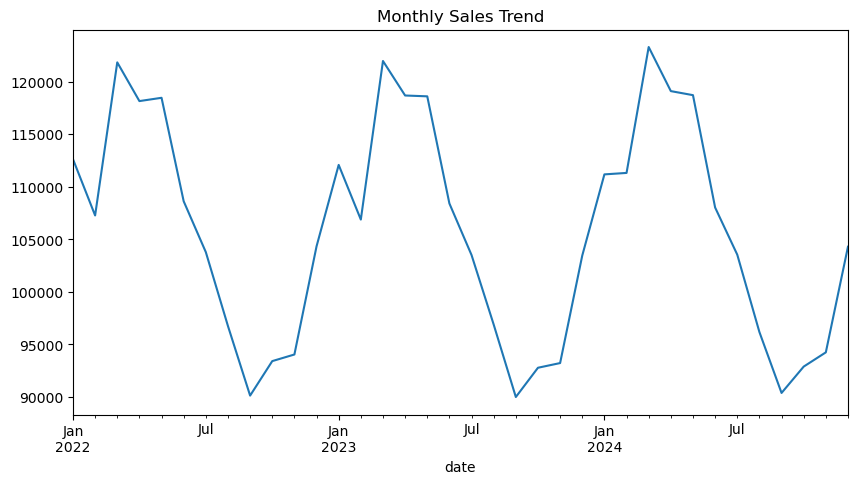

In [14]:
import matplotlib.pyplot as plt

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.show()

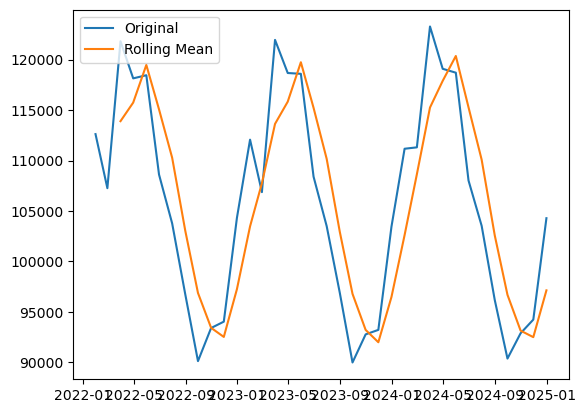

In [15]:
rolling = monthly_sales.rolling(window=3).mean()
plt.plot(monthly_sales, label='Original')
plt.plot(rolling, label='Rolling Mean')
plt.legend()
plt.show()

In [17]:
sale.dtypes

date     datetime64[ns]
store            object
item             object
sales             int64
dtype: object

In [18]:
train = monthly_sales[:-6]
test = monthly_sales[-6:]

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend='add', seasonal=None)
fit = model.fit()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


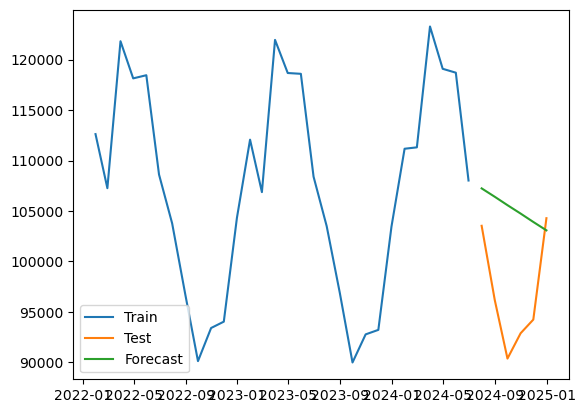

In [21]:
forecast = fit.forecast(6)

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100
print(mae, mape)

8649.267616000447 9.20784117572522


In [23]:
forecast.to_csv("forecast_results.csv")